In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

import importlib
import alignplot
import pprint
importlib.reload(alignplot)

from alignplot import StackedDotPlot

## another tara genome, this time with two contaminants

In [3]:
#dotplot = StackedDotPlot('TARA_PSE_MAG_00132', ('GCA_001550135.1', 'GCA_001641615.1'), 'list.csv', './genomes')
#dotplot.use_mashmap = True
#x = dotplot()

['./genomes/TARA_ANW_MAG_00083.fa']
found queryfile for TARA_ANW_MAG_00083: ./genomes/TARA_ANW_MAG_00083.fa
found targetfile for GCA_002171995.1: ./genomes/GCA_002171995.1_ASM217199v1_genomic.fna.gz
running nucmer & show-coords for ./genomes/GCA_002171995.1_ASM217199v1_genomic.fna.gz...
...done! reading output from /var/folders/y6/s1r3q87933s6gjdrtmts1npc0000gq/T/tmpnop2gd8f.
shared w/GCA_002171995.1: 348.5kb


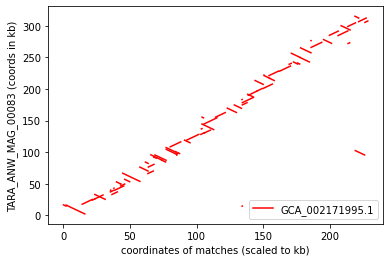

In [4]:
dotplot = StackedDotPlot('TARA_ANW_MAG_00083', ('GCA_002171995.1',), 'list.csv', './genomes')
#dotplot.use_mashmap = True
x = dotplot()

In [5]:
regions = list(dotplot.results.values())[0]

sorted_regions = []
for region in regions:
    pident = region.pident
    fident = pident / 100
    f_match = (region.qend - region.qstart) / region.qsize
    contig_ani = f_match * fident
    sorted_regions.append((contig_ani, f_match, region))

sorted_regions.sort(reverse=True)
pprint.pprint(sorted_regions[:3])
pprint.pprint(sorted_regions[-3:])

[(0.9992111489040059,
  0.9998110355253211,
  AlignedRegion(query='TARA_ANW_MAG_00083_000000000374', target='NHIK01000052.1', qstart=0.001, qend=5.292, tstart=5.424, tend=0.133, pident=99.94, qsize=5.292, tsize=5.292)),
 (0.9990611643740447,
  0.999861053216618,
  AlignedRegion(query='TARA_ANW_MAG_00083_000000000339', target='NHIK01000037.1', qstart=0.001, qend=7.197, tstart=0.026, tend=7.222, pident=99.92, qsize=7.197, tsize=7.197)),
 (0.9989716964171054,
  0.9998715808398613,
  AlignedRegion(query='TARA_ANW_MAG_00083_000000000217', target='NHIK01000083.1', qstart=1.119, qend=8.905, tstart=7.787, tend=0.001, pident=99.91, qsize=7.787, tsize=7.787))]
[(0.9588268421052635,
  0.9947368421052635,
  AlignedRegion(query='TARA_ANW_MAG_00083_000000000307', target='NHIK01000015.1', qstart=2.522, qend=2.711, tstart=4.589, tend=4.782, pident=96.39, qsize=0.19, tsize=0.194)),
 (0.9443606249999988,
  0.9937499999999988,
  AlignedRegion(query='TARA_ANW_MAG_00083_000000000146', target='NHIK01000058.

In [6]:
kb_above_95 = 0
total_kb = 0
for (contig_ani, _, region) in sorted_regions:
    size = region.qend - region.qstart
    if contig_ani >= .95:
        kb_above_95 += size # note: uniqify
    total_kb += size

print(f'{kb_above_95:.1f} kb in contigs > 95% ANI, {total_kb:.1f} kb total')
print(f'{kb_above_95/total_kb*100:.1f}% of shared sequence in contigs > 95% ANI')

348.1 kb in contigs > 95% ANI, 348.5 kb total
99.9% of shared sequence in contigs > 95% ANI
